# Imports

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import chess.pgn
import seaborn as sns
sns.set()
from datetime import datetime, timedelta

# Creating CSV from pgn

In [82]:
pgn_file_path = "this.pgn"
csv_file_path = "chess_games.csv" 
games_data = []

In [83]:

with open(pgn_file_path) as pgn_file:
    while True:
        game = chess.pgn.read_game(pgn_file)
        if game is None:
            break


        game_info = {
            "Event": game.headers.get("Event"),
            "Site": game.headers.get("Site"),
            "Date": game.headers.get("Date"),
            "Round": game.headers.get("Round"),
            "White": game.headers.get("White"),
            "Black": game.headers.get("Black"),
            "Result": game.headers.get("Result"),
            "UTCDate": game.headers.get("UTCDate"),
            "UTCTime": game.headers.get("UTCTime"),
            "WhiteElo": game.headers.get("WhiteElo"),
            "BlackElo": game.headers.get("BlackElo"),
            "WhiteRatingDiff": game.headers.get("WhiteRatingDiff"),
            "BlackRatingDiff": game.headers.get("BlackRatingDiff"),
            "Variant": game.headers.get("Variant"),
            "TimeControl": game.headers.get("TimeControl"),
            "ECO": game.headers.get("ECO"),
            "Termination": game.headers.get("Termination")
        }
        
      
        games_data.append(game_info)

In [84]:
df = pd.DataFrame(games_data)

In [85]:
df.to_csv(csv_file_path, index=False)

In [86]:
df

,Event,Site,Date,Round,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,Variant,TimeControl,ECO,Termination
0,Rated bullet game,https://lichess.org/cYfWYKuZ,2024.09.10,?,talmizrahi1,Almamaari,1-0,2024.09.10,18:37:59,1599,1613,+6,-6,Standard,60+0,C50,Normal
1,Rated bullet game,https://lichess.org/wB48iZgb,2024.09.10,?,Valentine_Nadler,talmizrahi1,0-1,2024.09.10,18:34:36,1585,1593,-5,+6,Standard,60+0,B54,Time forfeit
2,Rated bullet game,https://lichess.org/vPZ80D13,2024.09.10,?,talmizrahi1,alomerovic,1-0,2024.09.10,18:32:33,1588,1583,+5,-5,Standard,60+0,B40,Time forfeit
3,Rated bullet game,https://lichess.org/YI1COLnT,2024.09.10,?,ambitigambiti,talmizrahi1,0-1,2024.09.10,18:30:10,1553,1582,-5,+6,Standard,60+0,B22,Time forfeit
4,Rated bullet game,https://lichess.org/dmccFYHz,2024.09.10,?,Fjellrype,talmizrahi1,0-1,2024.09.10,18:27:57,1614,1576,-6,+6,Standard,60+0,A00,Time forfeit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,Rated blitz game,https://lichess.org/WsfCgkYa,2024.08.10,?,talmizrahi1,BazingaArma,0-1,2024.08.10,08:19:58,1357,1398,-5,+5,Standard,180+0,C02,Time forfeit
1591,Rated blitz game,https://lichess.org/QDvfgU1K,2024.08.10,?,hsn128,talmizrahi1,1-0,2024.08.10,07:42:34,1437,1361,+4,-4,Standard,180+0,B20,Time forfeit
1592,Rated blitz game,https://lichess.org/RUzo62bM,2024.08.10,?,talmizrahi1,dishar,0-1,2024.08.10,07:42:08,1367,1374,-6,+5,Standard,180+0,A05,Normal
1593,Rated blitz game,https://lichess.org/VwZyd9bW,2024.08.10,?,talmizrahi1,BroDanik777,0-1,2024.08.10,07:19:29,1373,1382,-6,+5,Standard,180+0,C50,Time forfeit


# Checkpoint1

In [87]:
dfcopy = df.copy()

# dropping irrelevent columns

In [88]:
dfcopy = dfcopy.drop(columns = ['WhiteRatingDiff','BlackRatingDiff',
                                'UTCDate','ECO',
                                'Variant','Round','Site'
                                ])

In [89]:
dfcopy

,Event,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,Termination
0,Rated bullet game,2024.09.10,talmizrahi1,Almamaari,1-0,18:37:59,1599,1613,60+0,Normal
1,Rated bullet game,2024.09.10,Valentine_Nadler,talmizrahi1,0-1,18:34:36,1585,1593,60+0,Time forfeit
2,Rated bullet game,2024.09.10,talmizrahi1,alomerovic,1-0,18:32:33,1588,1583,60+0,Time forfeit
3,Rated bullet game,2024.09.10,ambitigambiti,talmizrahi1,0-1,18:30:10,1553,1582,60+0,Time forfeit
4,Rated bullet game,2024.09.10,Fjellrype,talmizrahi1,0-1,18:27:57,1614,1576,60+0,Time forfeit
...,...,...,...,...,...,...,...,...,...,...
1590,Rated blitz game,2024.08.10,talmizrahi1,BazingaArma,0-1,08:19:58,1357,1398,180+0,Time forfeit
1591,Rated blitz game,2024.08.10,hsn128,talmizrahi1,1-0,07:42:34,1437,1361,180+0,Time forfeit
1592,Rated blitz game,2024.08.10,talmizrahi1,dishar,0-1,07:42:08,1367,1374,180+0,Normal
1593,Rated blitz game,2024.08.10,talmizrahi1,BroDanik777,0-1,07:19:29,1373,1382,180+0,Time forfeit


# Event to bullet only 

In [90]:
dfcopy['Event'].unique()

array(['Rated bullet game', 'Rated blitz game', 'Rated rapid game'],
      dtype=object)

In [91]:
dfcopy = dfcopy[dfcopy['Event'] == 'Rated bullet game']

In [92]:
dfcopy = dfcopy.drop(columns=['Event'])

In [93]:
dfcopy

,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,Termination
0,2024.09.10,talmizrahi1,Almamaari,1-0,18:37:59,1599,1613,60+0,Normal
1,2024.09.10,Valentine_Nadler,talmizrahi1,0-1,18:34:36,1585,1593,60+0,Time forfeit
2,2024.09.10,talmizrahi1,alomerovic,1-0,18:32:33,1588,1583,60+0,Time forfeit
3,2024.09.10,ambitigambiti,talmizrahi1,0-1,18:30:10,1553,1582,60+0,Time forfeit
4,2024.09.10,Fjellrype,talmizrahi1,0-1,18:27:57,1614,1576,60+0,Time forfeit
...,...,...,...,...,...,...,...,...,...
1526,2024.08.11,Salinsiraj,talmizrahi1,1-0,16:34:24,1145,1294,120+1,Normal
1527,2024.08.11,RonaldoP227,talmizrahi1,0-1,16:30:02,1338,1208,120+1,Normal
1528,2024.08.11,lolcia11,talmizrahi1,0-1,16:28:57,1160,1125,120+1,Normal
1529,2024.08.11,KarlKlawutke,talmizrahi1,1-0,16:19:17,1240,1212,120+1,Time forfeit


# TimeControl to only 60sec 

In [94]:
dfcopy['TimeControl'].unique()

array(['60+0', '120+1'], dtype=object)

In [95]:
dfcopy = dfcopy[dfcopy['TimeControl'] == '60+0']

In [96]:
dfcopy.tail()

,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,Termination
1487,2024.08.14,talmizrahi1,TheUberPawnCapturer,1-0,16:16:24,1268,1248,60+0,Normal
1488,2024.08.14,tataybey,talmizrahi1,0-1,15:59:29,1271,1259,60+0,Normal
1489,2024.08.14,talmizrahi1,egorov_ivan2000,1-0,15:46:27,1250,1243,60+0,Time forfeit
1490,2024.08.14,krupnov_v,talmizrahi1,1-0,15:44:10,1149,1262,60+0,Normal
1491,2024.08.14,talmizrahi1,Sadi07,1-0,15:22:51,1251,1302,60+0,Time forfeit


In [97]:
dfcopy = dfcopy.drop(columns=['TimeControl'])

In [98]:
dfcopy

,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,Termination
0,2024.09.10,talmizrahi1,Almamaari,1-0,18:37:59,1599,1613,Normal
1,2024.09.10,Valentine_Nadler,talmizrahi1,0-1,18:34:36,1585,1593,Time forfeit
2,2024.09.10,talmizrahi1,alomerovic,1-0,18:32:33,1588,1583,Time forfeit
3,2024.09.10,ambitigambiti,talmizrahi1,0-1,18:30:10,1553,1582,Time forfeit
4,2024.09.10,Fjellrype,talmizrahi1,0-1,18:27:57,1614,1576,Time forfeit
...,...,...,...,...,...,...,...,...
1487,2024.08.14,talmizrahi1,TheUberPawnCapturer,1-0,16:16:24,1268,1248,Normal
1488,2024.08.14,tataybey,talmizrahi1,0-1,15:59:29,1271,1259,Normal
1489,2024.08.14,talmizrahi1,egorov_ivan2000,1-0,15:46:27,1250,1243,Time forfeit
1490,2024.08.14,krupnov_v,talmizrahi1,1-0,15:44:10,1149,1262,Normal


# checkpoint2

In [99]:
dfcopy2 = dfcopy.copy()

In [100]:
dfcopy2

,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,Termination
0,2024.09.10,talmizrahi1,Almamaari,1-0,18:37:59,1599,1613,Normal
1,2024.09.10,Valentine_Nadler,talmizrahi1,0-1,18:34:36,1585,1593,Time forfeit
2,2024.09.10,talmizrahi1,alomerovic,1-0,18:32:33,1588,1583,Time forfeit
3,2024.09.10,ambitigambiti,talmizrahi1,0-1,18:30:10,1553,1582,Time forfeit
4,2024.09.10,Fjellrype,talmizrahi1,0-1,18:27:57,1614,1576,Time forfeit
...,...,...,...,...,...,...,...,...
1487,2024.08.14,talmizrahi1,TheUberPawnCapturer,1-0,16:16:24,1268,1248,Normal
1488,2024.08.14,tataybey,talmizrahi1,0-1,15:59:29,1271,1259,Normal
1489,2024.08.14,talmizrahi1,egorov_ivan2000,1-0,15:46:27,1250,1243,Time forfeit
1490,2024.08.14,krupnov_v,talmizrahi1,1-0,15:44:10,1149,1262,Normal


# getting rid of the opponents

In [101]:
dfcopy2['White'] = dfcopy2['White'].apply(lambda x: 'talmizrahi1' if x == 'talmizrahi1' else 'opponent')
dfcopy2['Black'] = dfcopy2['Black'].apply(lambda x: 'talmizrahi1' if x == 'talmizrahi1' else 'opponent')

In [102]:
dfcopy2

,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,Termination
0,2024.09.10,talmizrahi1,opponent,1-0,18:37:59,1599,1613,Normal
1,2024.09.10,opponent,talmizrahi1,0-1,18:34:36,1585,1593,Time forfeit
2,2024.09.10,talmizrahi1,opponent,1-0,18:32:33,1588,1583,Time forfeit
3,2024.09.10,opponent,talmizrahi1,0-1,18:30:10,1553,1582,Time forfeit
4,2024.09.10,opponent,talmizrahi1,0-1,18:27:57,1614,1576,Time forfeit
...,...,...,...,...,...,...,...,...
1487,2024.08.14,talmizrahi1,opponent,1-0,16:16:24,1268,1248,Normal
1488,2024.08.14,opponent,talmizrahi1,0-1,15:59:29,1271,1259,Normal
1489,2024.08.14,talmizrahi1,opponent,1-0,15:46:27,1250,1243,Time forfeit
1490,2024.08.14,opponent,talmizrahi1,1-0,15:44:10,1149,1262,Normal


In [103]:
dfcopy2['TalMizrahiElo'] = dfcopy2.apply(
    lambda row: row['WhiteElo'] if row['White'] == 'talmizrahi1'
      else row['BlackElo'], axis=1)
dfcopy2

,Date,White,Black,Result,UTCTime,WhiteElo,BlackElo,Termination,TalMizrahiElo
0,2024.09.10,talmizrahi1,opponent,1-0,18:37:59,1599,1613,Normal,1599
1,2024.09.10,opponent,talmizrahi1,0-1,18:34:36,1585,1593,Time forfeit,1593
2,2024.09.10,talmizrahi1,opponent,1-0,18:32:33,1588,1583,Time forfeit,1588
3,2024.09.10,opponent,talmizrahi1,0-1,18:30:10,1553,1582,Time forfeit,1582
4,2024.09.10,opponent,talmizrahi1,0-1,18:27:57,1614,1576,Time forfeit,1576
...,...,...,...,...,...,...,...,...,...
1487,2024.08.14,talmizrahi1,opponent,1-0,16:16:24,1268,1248,Normal,1268
1488,2024.08.14,opponent,talmizrahi1,0-1,15:59:29,1271,1259,Normal,1259
1489,2024.08.14,talmizrahi1,opponent,1-0,15:46:27,1250,1243,Time forfeit,1250
1490,2024.08.14,opponent,talmizrahi1,1-0,15:44:10,1149,1262,Normal,1262


In [104]:
dfcopy2 = dfcopy2.drop(columns = ['WhiteElo','BlackElo'])
dfcopy2

,Date,White,Black,Result,UTCTime,Termination,TalMizrahiElo
0,2024.09.10,talmizrahi1,opponent,1-0,18:37:59,Normal,1599
1,2024.09.10,opponent,talmizrahi1,0-1,18:34:36,Time forfeit,1593
2,2024.09.10,talmizrahi1,opponent,1-0,18:32:33,Time forfeit,1588
3,2024.09.10,opponent,talmizrahi1,0-1,18:30:10,Time forfeit,1582
4,2024.09.10,opponent,talmizrahi1,0-1,18:27:57,Time forfeit,1576
...,...,...,...,...,...,...,...
1487,2024.08.14,talmizrahi1,opponent,1-0,16:16:24,Normal,1268
1488,2024.08.14,opponent,talmizrahi1,0-1,15:59:29,Normal,1259
1489,2024.08.14,talmizrahi1,opponent,1-0,15:46:27,Time forfeit,1250
1490,2024.08.14,opponent,talmizrahi1,1-0,15:44:10,Normal,1262


In [105]:
dfcopy2['TalMizrahiColor'] = dfcopy2.apply(
    lambda row: 'White' if row['White'] == 'talmizrahi1' 
                        else 'Black', axis=1)

In [106]:
dfcopy2 = dfcopy2.drop(columns=['White', 'Black'])

In [107]:
dfcopy2

,Date,Result,UTCTime,Termination,TalMizrahiElo,TalMizrahiColor
0,2024.09.10,1-0,18:37:59,Normal,1599,White
1,2024.09.10,0-1,18:34:36,Time forfeit,1593,Black
2,2024.09.10,1-0,18:32:33,Time forfeit,1588,White
3,2024.09.10,0-1,18:30:10,Time forfeit,1582,Black
4,2024.09.10,0-1,18:27:57,Time forfeit,1576,Black
...,...,...,...,...,...,...
1487,2024.08.14,1-0,16:16:24,Normal,1268,White
1488,2024.08.14,0-1,15:59:29,Normal,1259,Black
1489,2024.08.14,1-0,15:46:27,Time forfeit,1250,White
1490,2024.08.14,1-0,15:44:10,Normal,1262,Black


In [108]:
def adjust_result(row):
    if row['TalMizrahiColor'] == 'White' and row['Result'] == '1-0':
        return 1
    elif row['TalMizrahiColor'] == 'White' and row['Result'] == '0-1':
        return -1
    elif row['TalMizrahiColor'] == 'Black' and row['Result'] == '1-0':
        return -1
    elif row['TalMizrahiColor'] == 'Black' and row['Result'] == '0-1':
        return 1
    elif row['Result'] == '1/2-1/2':
        return 0
    return row['Result']

In [109]:
dfcopy2['Result'] = dfcopy2.apply(adjust_result, axis=1)

In [110]:
dfcopy2.head(20)

,Date,Result,UTCTime,Termination,TalMizrahiElo,TalMizrahiColor
0,2024.09.10,1,18:37:59,Normal,1599,White
1,2024.09.10,1,18:34:36,Time forfeit,1593,Black
2,2024.09.10,1,18:32:33,Time forfeit,1588,White
3,2024.09.10,1,18:30:10,Time forfeit,1582,Black
4,2024.09.10,1,18:27:57,Time forfeit,1576,Black
5,2024.09.10,-1,18:26:18,Normal,1582,White
6,2024.09.10,1,18:24:00,Time forfeit,1577,Black
7,2024.09.10,-1,18:21:50,Time forfeit,1584,White
8,2024.09.10,-1,18:19:36,Time forfeit,1588,White
9,2024.09.10,-1,18:17:34,Time forfeit,1594,White


# Checkpoint3

In [112]:
dfcopy3 = dfcopy2.copy()


# Termination to dummys

In [113]:
dfcopy3.rename(columns={'Termination': 'Timeout'}, inplace=True)
dfcopy3.head(1)


,Date,Result,UTCTime,Timeout,TalMizrahiElo,TalMizrahiColor
0,2024.09.10,1,18:37:59,Normal,1599,White


In [114]:
dfcopy3['Timeout'] = dfcopy3['Timeout'].apply(lambda x: 1 if x == 'Time forfeit' else 0)

In [115]:
dfcopy3.head(3)

,Date,Result,UTCTime,Timeout,TalMizrahiElo,TalMizrahiColor
0,2024.09.10,1,18:37:59,0,1599,White
1,2024.09.10,1,18:34:36,1,1593,Black
2,2024.09.10,1,18:32:33,1,1588,White


# UTCTime to Time intervals

In [119]:
def adjust_utc_time(row):
    time_format = "%H:%M:%S" 
    date_format = "%Y.%m.%d" 
    

    time_obj = datetime.strptime(row['UTCTime'], time_format)
    date_obj = datetime.strptime(row['Date'], date_format)


    updated_time = time_obj + timedelta(hours=3)


    if updated_time.day != time_obj.day: 
        date_obj += timedelta(days=1)  
    

    row['UTCTime'] = updated_time.strftime(time_format)
    row['Date'] = date_obj.strftime(date_format)
    
    return row


dfcopy3 = dfcopy3.apply(adjust_utc_time, axis=1)

dfcopy3.head(20)

,Date,Result,UTCTime,Timeout,TalMizrahiElo,TalMizrahiColor
0,2024.09.11,1,00:37:59,0,1599,White
1,2024.09.11,1,00:34:36,1,1593,Black
2,2024.09.11,1,00:32:33,1,1588,White
3,2024.09.11,1,00:30:10,1,1582,Black
4,2024.09.11,1,00:27:57,1,1576,Black
5,2024.09.11,-1,00:26:18,0,1582,White
6,2024.09.11,1,00:24:00,1,1577,Black
7,2024.09.11,-1,00:21:50,1,1584,White
8,2024.09.11,-1,00:19:36,1,1588,White
9,2024.09.11,-1,00:17:34,1,1594,White


In [120]:
def assign_time_interval(time):
    hour = int(time.split(':')[0])  
    if 0 <= hour < 2:
        return '00:00-02:00'
    elif 2 <= hour < 4:
        return '02:00-04:00'
    elif 4 <= hour < 6:
        return '04:00-06:00'
    elif 6 <= hour < 8:
        return '06:00-08:00'
    elif 8 <= hour < 10:
        return '08:00-10:00'
    elif 10 <= hour < 12:
        return '10:00-12:00'
    elif 12 <= hour < 14:
        return '12:00-14:00'
    elif 14 <= hour < 16:
        return '14:00-16:00'
    elif 16 <= hour < 18:
        return '16:00-18:00'
    elif 18 <= hour < 20:
        return '18:00-20:00'
    elif 20 <= hour < 22:
        return '20:00-22:00'
    else:
        return '22:00-00:00'


dfcopy3['TimeInterval'] = dfcopy3['UTCTime'].apply(assign_time_interval)

dfcopy3.head(10)

,Date,Result,UTCTime,Timeout,TalMizrahiElo,TalMizrahiColor,TimeInterval
0,2024.09.11,1,00:37:59,0,1599,White,00:00-02:00
1,2024.09.11,1,00:34:36,1,1593,Black,00:00-02:00
2,2024.09.11,1,00:32:33,1,1588,White,00:00-02:00
3,2024.09.11,1,00:30:10,1,1582,Black,00:00-02:00
4,2024.09.11,1,00:27:57,1,1576,Black,00:00-02:00
5,2024.09.11,-1,00:26:18,0,1582,White,00:00-02:00
6,2024.09.11,1,00:24:00,1,1577,Black,00:00-02:00
7,2024.09.11,-1,00:21:50,1,1584,White,00:00-02:00
8,2024.09.11,-1,00:19:36,1,1588,White,00:00-02:00
9,2024.09.11,-1,00:17:34,1,1594,White,00:00-02:00


In [121]:
dfcopy3 = dfcopy3.drop(columns = ['UTCTime'])
dfcopy3

,Date,Result,Timeout,TalMizrahiElo,TalMizrahiColor,TimeInterval
0,2024.09.11,1,0,1599,White,00:00-02:00
1,2024.09.11,1,1,1593,Black,00:00-02:00
2,2024.09.11,1,1,1588,White,00:00-02:00
3,2024.09.11,1,1,1582,Black,00:00-02:00
4,2024.09.11,1,1,1576,Black,00:00-02:00
...,...,...,...,...,...,...
1487,2024.08.14,1,0,1268,White,22:00-00:00
1488,2024.08.14,1,0,1259,Black,20:00-22:00
1489,2024.08.14,1,1,1250,White,20:00-22:00
1490,2024.08.14,-1,0,1262,Black,20:00-22:00


# Table arrangement

In [123]:
dfcopy3 = dfcopy3.rename({'TalMizrahiElo' : 'Rating',
                'TalMizrahiColor' : 'Color'}, axis='columns')
dfcopy3

,Date,Result,Timeout,Rating,Color,TimeInterval
0,2024.09.11,1,0,1599,White,00:00-02:00
1,2024.09.11,1,1,1593,Black,00:00-02:00
2,2024.09.11,1,1,1588,White,00:00-02:00
3,2024.09.11,1,1,1582,Black,00:00-02:00
4,2024.09.11,1,1,1576,Black,00:00-02:00
...,...,...,...,...,...,...
1487,2024.08.14,1,0,1268,White,22:00-00:00
1488,2024.08.14,1,0,1259,Black,20:00-22:00
1489,2024.08.14,1,1,1250,White,20:00-22:00
1490,2024.08.14,-1,0,1262,Black,20:00-22:00


In [124]:
dfcopy3.columns

Index(['Date', 'Result', 'Timeout', 'Rating', 'Color', 'TimeInterval'], dtype='object')

In [125]:
dfcopy3 = dfcopy3[['Date','TimeInterval','Color' , 'Result', 'Timeout', 'Rating' ]]


dfcopy3.head(10)

,Date,TimeInterval,Color,Result,Timeout,Rating
0,2024.09.11,00:00-02:00,White,1,0,1599
1,2024.09.11,00:00-02:00,Black,1,1,1593
2,2024.09.11,00:00-02:00,White,1,1,1588
3,2024.09.11,00:00-02:00,Black,1,1,1582
4,2024.09.11,00:00-02:00,Black,1,1,1576
5,2024.09.11,00:00-02:00,White,-1,0,1582
6,2024.09.11,00:00-02:00,Black,1,1,1577
7,2024.09.11,00:00-02:00,White,-1,1,1584
8,2024.09.11,00:00-02:00,White,-1,1,1588
9,2024.09.11,00:00-02:00,White,-1,1,1594


# Checkpoint 4

In [144]:
df_finished = dfcopy3.copy()

<Figure size 1000x600 with 0 Axes>

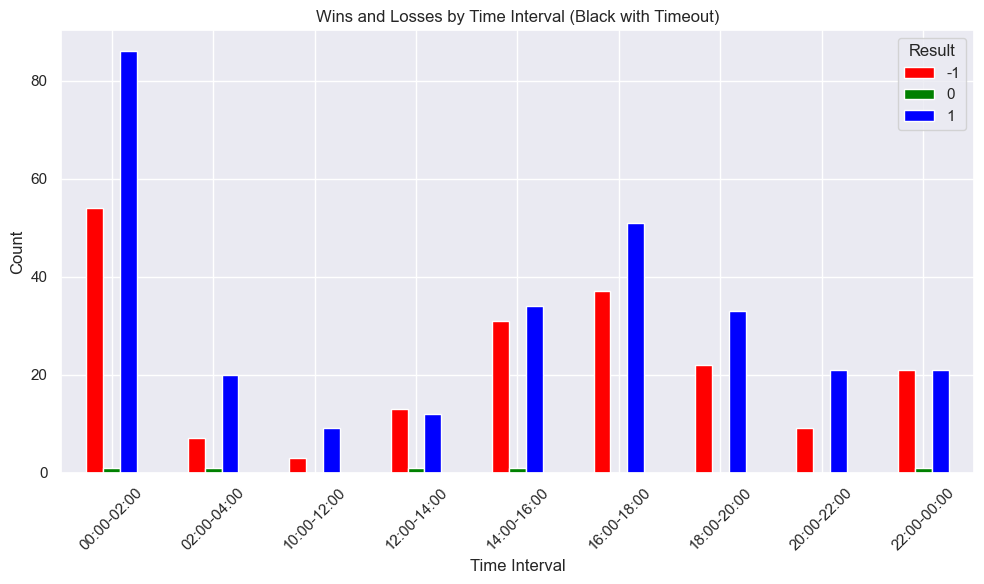

In [145]:
df_black_timeout = df_finished[(df_finished['Timeout'] == 1) & (df_finished['Color'] == 'Black')]

wins_losses_by_time = df_black_timeout.groupby(['TimeInterval', 'Result']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
wins_losses_by_time.plot(kind='bar', stacked=False, color=['red', 'green', 'blue'], figsize=(10, 6))


plt.title('Wins and Losses by Time Interval (Black with Timeout)')
plt.xlabel('Time Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

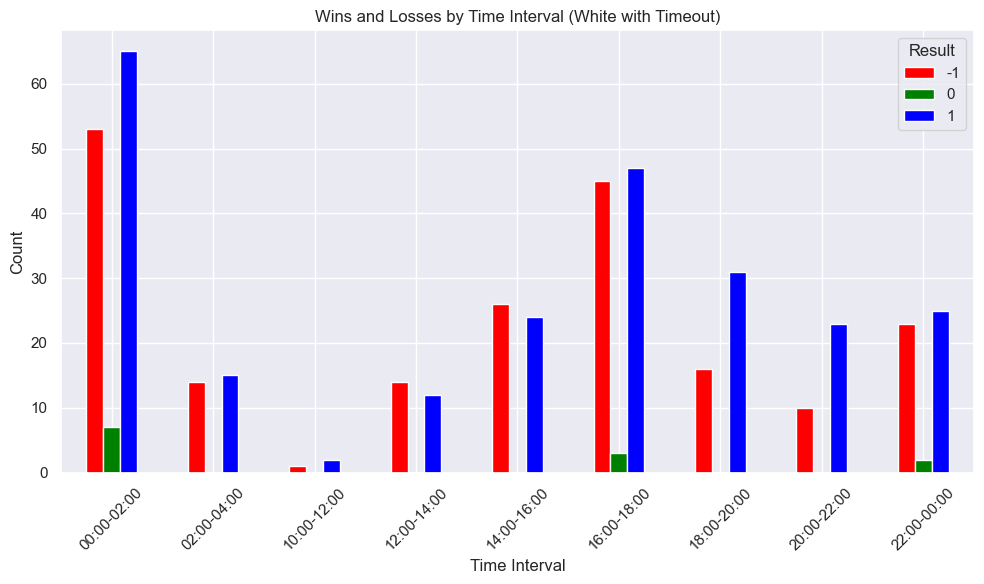

In [146]:
df_white_timeout = df_finished[(df_finished['Timeout'] == 1) & (df_finished['Color'] == 'White')]

wins_losses_by_time = df_white_timeout.groupby(['TimeInterval', 'Result']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
wins_losses_by_time.plot(kind='bar', stacked=False, color=['red', 'green', 'blue'], figsize=(10, 6))


plt.title('Wins and Losses by Time Interval (White with Timeout)')
plt.xlabel('Time Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()


In [147]:
df_finished.dtypes

Date            object
TimeInterval    object
Color           object
Result           int64
Timeout          int64
Rating          object
dtype: object

In [142]:
df_finished

,Date,TimeInterval,Color,Result,Timeout,Rating
0,2024.09.11,00:00-02:00,White,1,0,1599
1,2024.09.11,00:00-02:00,Black,1,1,1593
2,2024.09.11,00:00-02:00,White,1,1,1588
3,2024.09.11,00:00-02:00,Black,1,1,1582
4,2024.09.11,00:00-02:00,Black,1,1,1576
...,...,...,...,...,...,...
1487,2024.08.14,22:00-00:00,White,1,0,1268
1488,2024.08.14,20:00-22:00,Black,1,0,1259
1489,2024.08.14,20:00-22:00,White,1,1,1250
1490,2024.08.14,20:00-22:00,Black,-1,0,1262


In [148]:
df_finished['Rating'] = df_finished['Rating'].astype(int)
df_finished

,Date,TimeInterval,Color,Result,Timeout,Rating
0,2024.09.11,00:00-02:00,White,1,0,1599
1,2024.09.11,00:00-02:00,Black,1,1,1593
2,2024.09.11,00:00-02:00,White,1,1,1588
3,2024.09.11,00:00-02:00,Black,1,1,1582
4,2024.09.11,00:00-02:00,Black,1,1,1576
...,...,...,...,...,...,...
1487,2024.08.14,22:00-00:00,White,1,0,1268
1488,2024.08.14,20:00-22:00,Black,1,0,1259
1489,2024.08.14,20:00-22:00,White,1,1,1250
1490,2024.08.14,20:00-22:00,Black,-1,0,1262


In [149]:

df_summary = df_finished.groupby('Date').agg(ResultMean=('Result', 'mean'), RatingMean=('Rating', 'mean')).reset_index()
df_summary['ResultMean'] = df_summary['ResultMean'].round(2)
df_summary['RatingMean'] = df_summary['RatingMean'].round(2)


df_summary


,Date,ResultMean,RatingMean
0,2024.08.14,0.56,1265.22
1,2024.08.15,0.00,1297.12
2,2024.08.16,-0.26,1290.32
3,2024.08.17,0.23,1299.08
4,2024.08.18,0.14,1310.64
5,2024.08.19,-0.11,1322.66
6,2024.08.20,0.04,1347.10
7,2024.08.21,0.05,1334.34
8,2024.08.22,0.09,1374.48
9,2024.08.23,0.07,1368.64


In [150]:
df_summary['ResultMean'].sum()

np.float64(1.72)

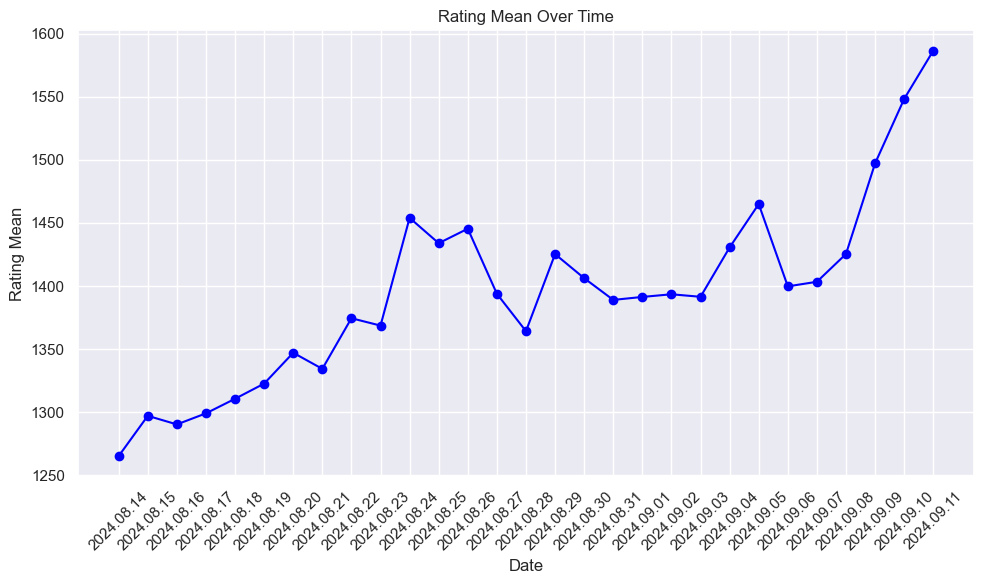

In [151]:

plt.figure(figsize=(10, 6))
plt.plot(df_summary['Date'], df_summary['RatingMean'], marker='o', linestyle='-', color='blue')


plt.title('Rating Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Rating Mean')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()

In [152]:
df_finished.head(5)

,Date,TimeInterval,Color,Result,Timeout,Rating
0,2024.09.11,00:00-02:00,White,1,0,1599
1,2024.09.11,00:00-02:00,Black,1,1,1593
2,2024.09.11,00:00-02:00,White,1,1,1588
3,2024.09.11,00:00-02:00,Black,1,1,1582
4,2024.09.11,00:00-02:00,Black,1,1,1576


In [153]:
df_normal = df_finished[(df_finished['Timeout'] == 0) 
            ]

df_normal_mean = df_normal.groupby('Date').agg(ResultMean=('Result', 'mean')).reset_index()
df_normal_mean['ResultMean'] = df_normal_mean['ResultMean'].round(2)


df_normal_mean

,Date,ResultMean
0,2024.08.14,0.33
1,2024.08.15,0.20
2,2024.08.16,-0.50
3,2024.08.17,0.20
4,2024.08.18,-0.25
5,2024.08.19,-0.22
6,2024.08.20,0.03
7,2024.08.21,-0.09
8,2024.08.22,0.00
9,2024.08.23,0.16


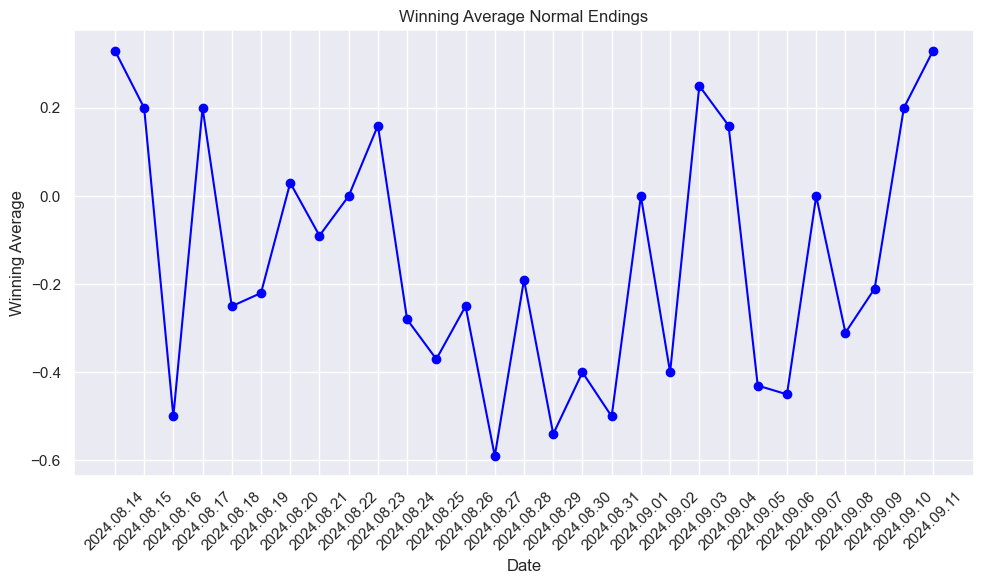

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(df_normal_mean['Date'],
          df_normal_mean['ResultMean'],
            marker='o',
              linestyle='-', 
              color='blue')


plt.title('Winning Average Normal Endings')
plt.xlabel('Date')
plt.ylabel('Winning Average')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()